In [1]:
# -*- coding: utf-8 -*-

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 16
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 14
#set size of num_bers on x-axis
plt.rcParams['xtick.labelsize'] = 12
#set size of num_bers on y-axis
plt.rcParams['ytick.labelsize'] = 12
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
plt.rcParams['lines.markersize'] = 10
#set num_ber of times marker is shown when displaying legend
plt.rcParams['legend.numpoints'] = 1
#Set size of type in legend
plt.rcParams['legend.fontsize'] = 10
#set pixel density of figures
plt.rcParams['figure.dpi'] = 300

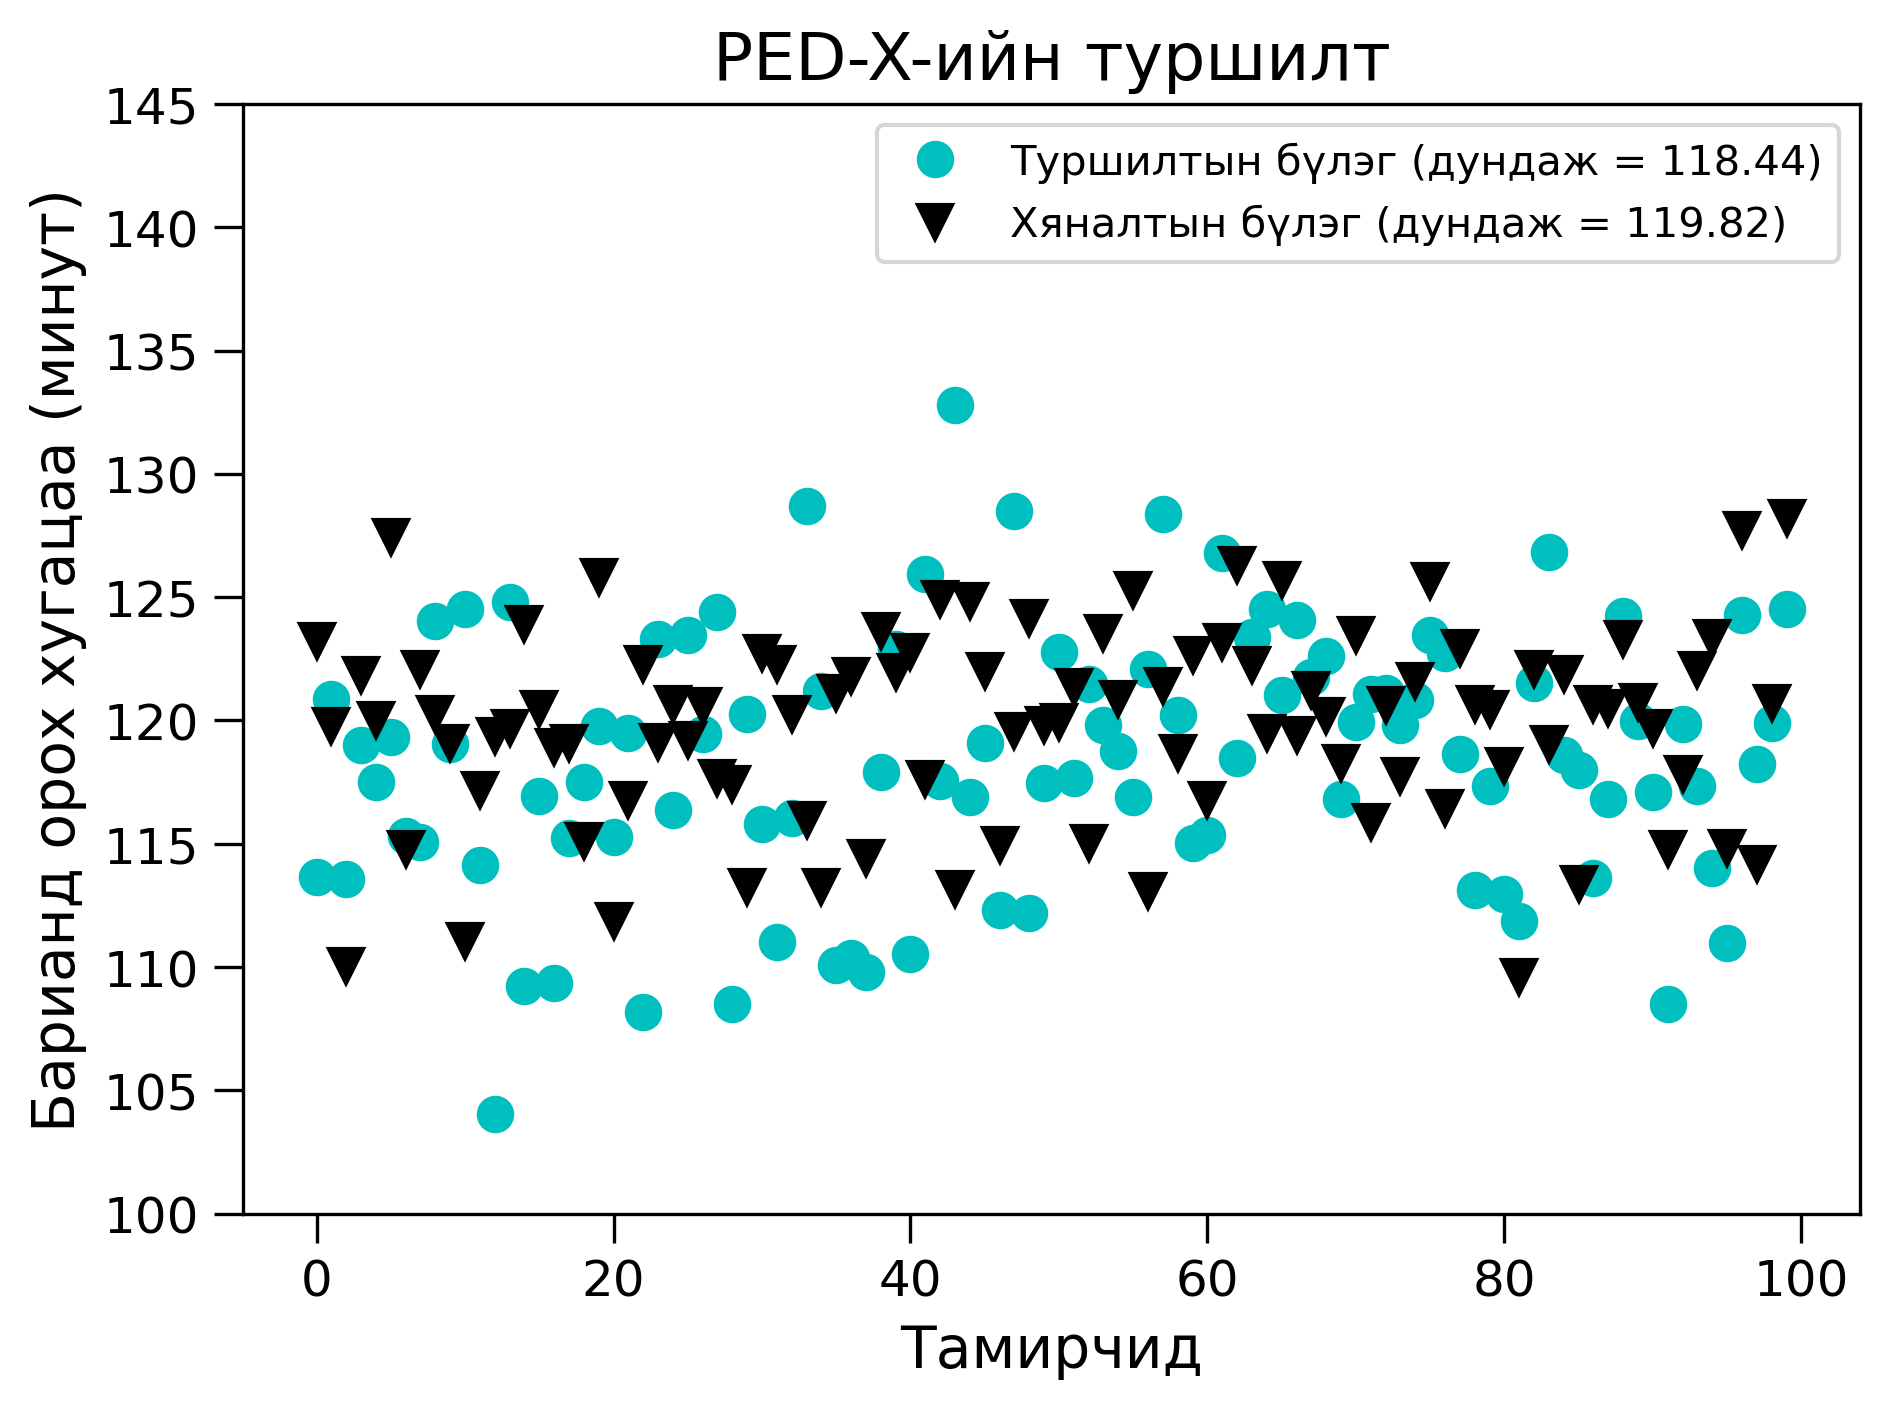

In [3]:
# # Code used to generate data for Figure 21-1 on page 458
random.seed(148)
treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
treatment_times, control_times = [], []
for s in range(sample_size):
    treatment_times.append(random.gauss(treatment_dist[0],
                                        treatment_dist[1]))
    control_times.append(random.gauss(control_dist[0],
                                      control_dist[1]))
control_mean = sum(control_times)/len(control_times)
treatment_mean = sum(treatment_times)/len(treatment_times)

plt.plot(treatment_times, 'co', markersize = 8,
        label = 'Туршилтын бүлэг (дундаж = ' +
        str(round(treatment_mean, 2)) + ')')
plt.plot(control_times, 'kv', markersize = 8,
        label = 'Хяналтын бүлэг (дундаж = ' +
        str(round(control_mean,2)) + ')')
plt.title('PED-X-ийн туршилт')
plt.xlabel('Тамирчид')
plt.ylabel('Барианд орох хугацаа (минут)')
plt.ylim(100, 145)
plt.legend()
# Ensure the legend and labels fit the saved figure
plt.tight_layout()
plt.savefig('figure21-1.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

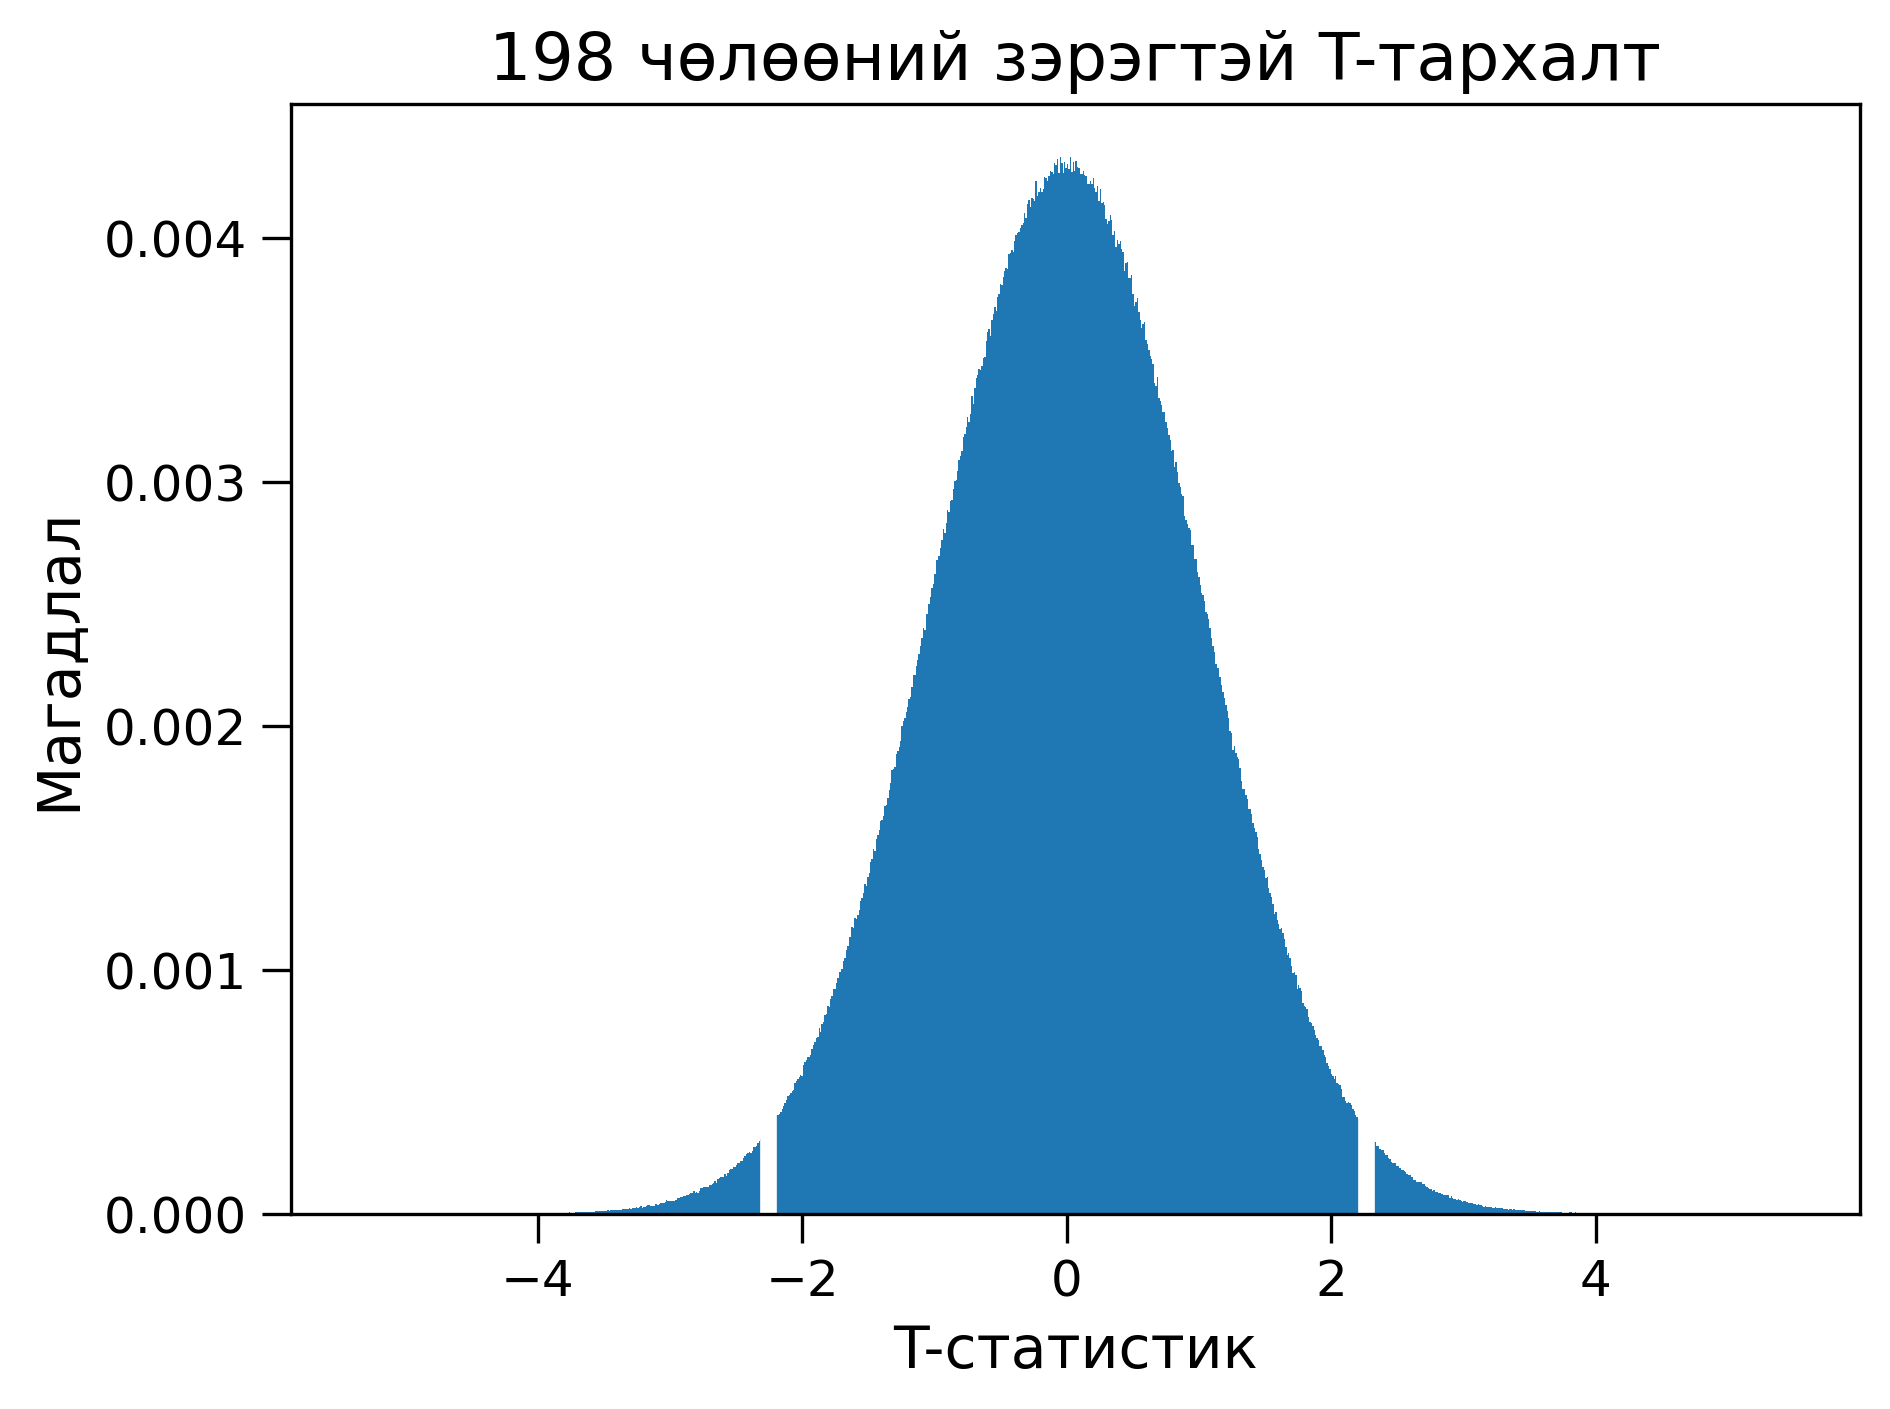

In [5]:
# Code from page 463
t_stat = -2.26 # t-statistic for PED-X example
t_dist = []
num_bins = 1000
for i in range(10000000):
  t_dist.append(scipy.stats.t.rvs(198))
plt.hist(t_dist, bins = num_bins,
            weights = np.array(len(t_dist)*[1.0])/len(t_dist))
plt.axvline(t_stat, color = 'w') 
plt.axvline(-t_stat, color = 'w')
plt.title('198 чөлөөний зэрэгтэй T-тархалт')
plt.xlabel('T-статистик')
plt.ylabel('Магадлал')
plt.tight_layout()
plt.savefig('figure21-4.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [6]:
# Figure 21-5 on page 465
control_mean = round(sum(control_times)/len(control_times), 2)
treatment_mean = round(sum(treatment_times)/len(treatment_times), 2)
print('Туршилтын бүлгийн дундаж - хяналтын бүлгийн дундаж =',
      round(treatment_mean - control_mean, 2), 'Минут')
two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                        control_times,
                                        equal_var = False)
print('Хоёр-түүврийн тестийн t-статистик нь',
      round(two_sample_test[0], 2))
print('Хоёр-түүврийн тестийн p-утга нь',
      round(two_sample_test[1], 2))

Туршилтын бүлгийн дундаж - хяналтын бүлгийн дундаж = -1.38 Минут
Хоёр-түүврийн тестийн t-статистик нь -2.11
Хоёр-түүврийн тестийн p-утга нь 0.04


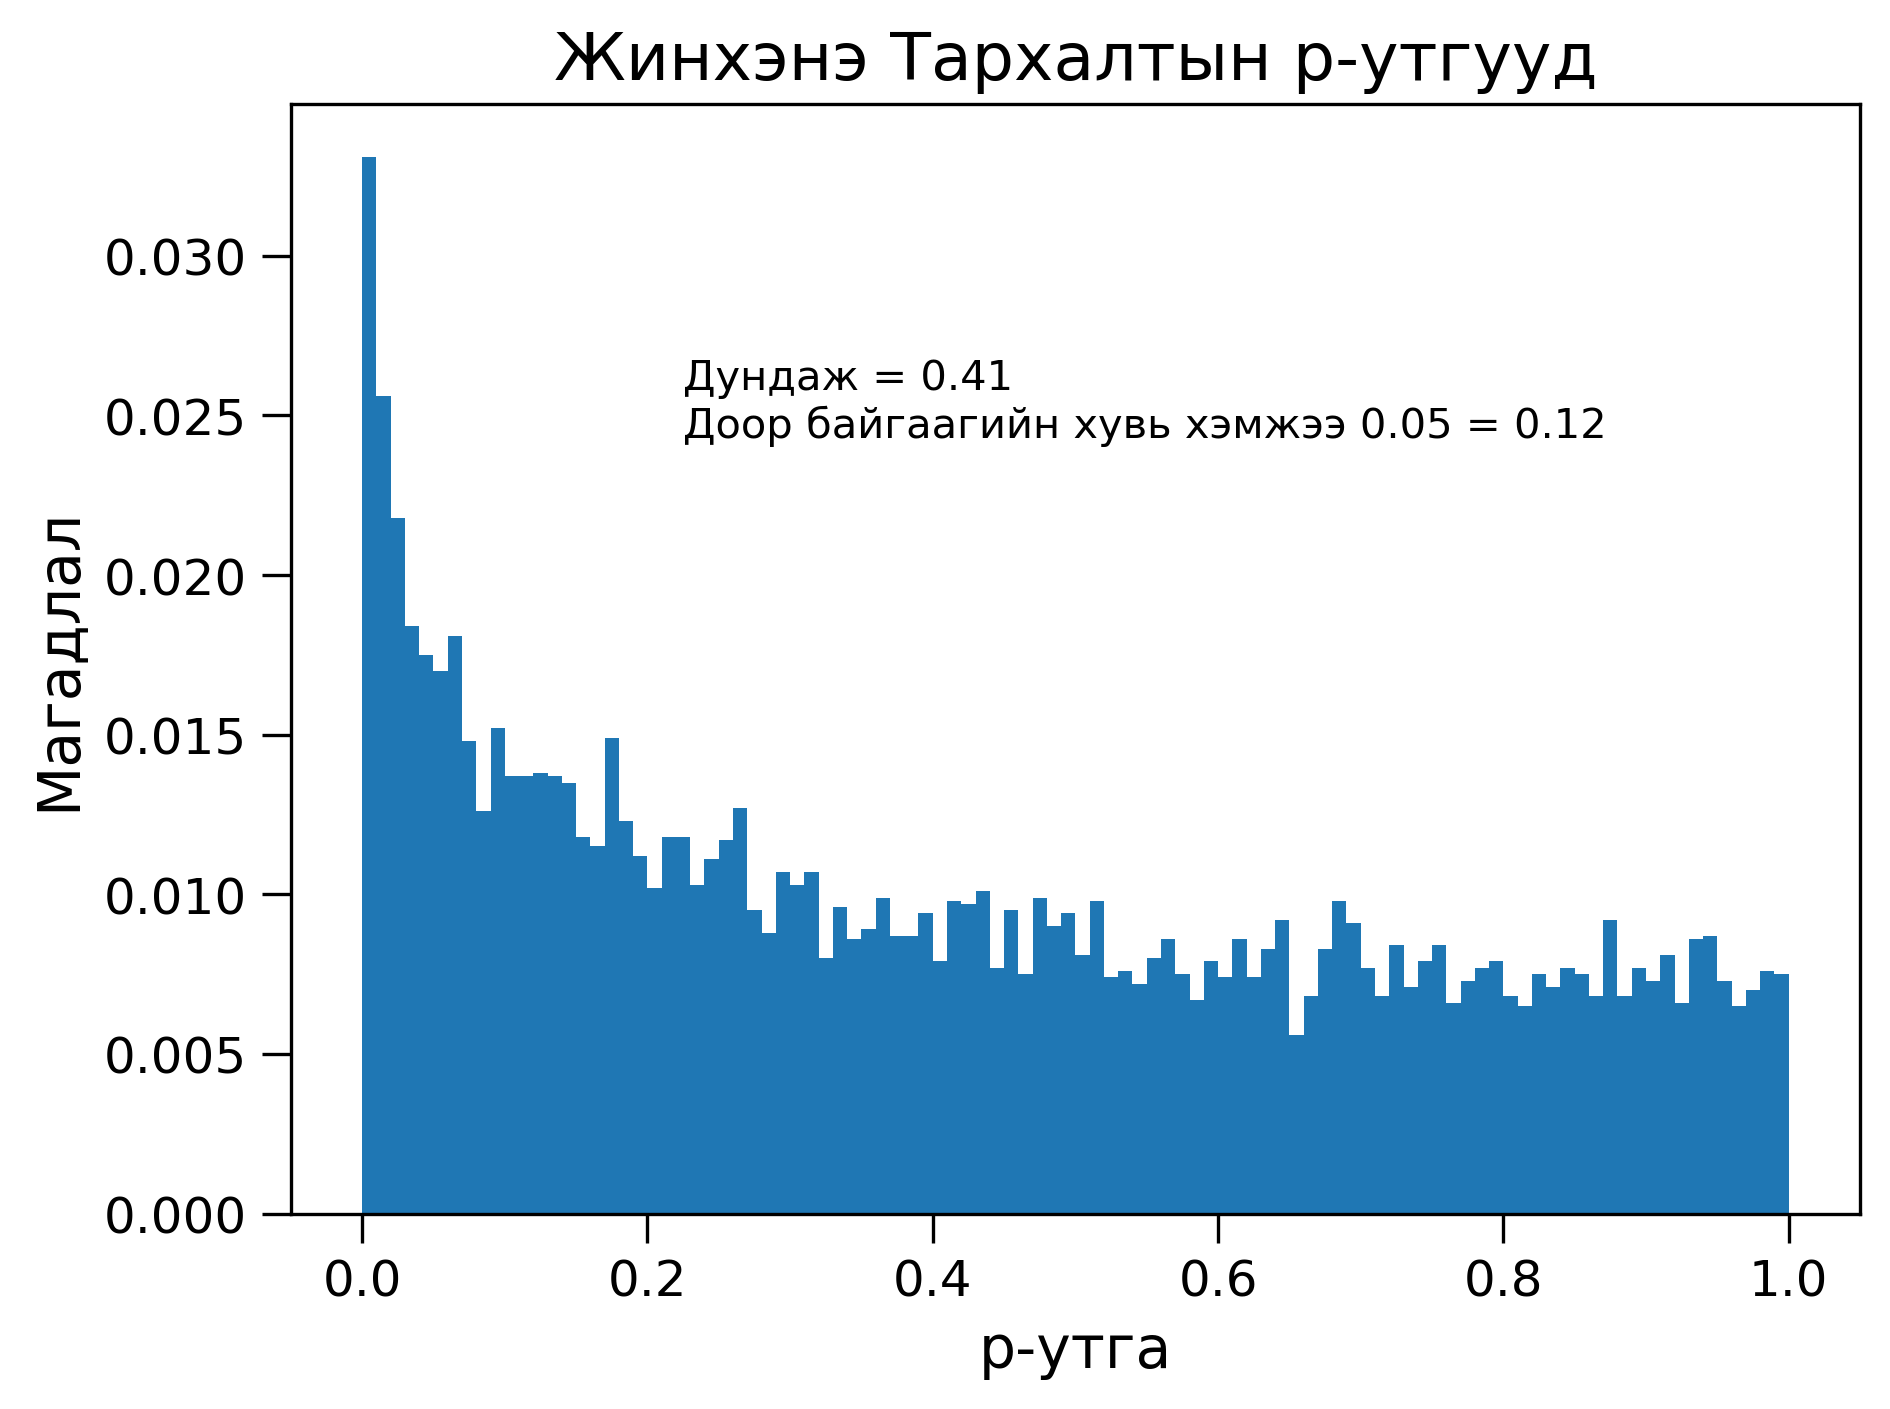

In [9]:
# Code that produced Figure 21-7 on page 468

random.seed(0)

treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
p_vals = []
for _ in range(10000):
    treatment_times, control_times = [], []
    for s in range(sample_size):
        treatment_times.append(random.gauss(treatment_dist[0],
                                            treatment_dist[1]))
        control_times.append(random.gauss(control_dist[0],
                                          control_dist[1]))
    two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                                control_times,
                                                equal_var = False)
    p_vals.append(two_sample_test[1])
mean = sum(p_vals)/len(p_vals)
num_below = 0
cut_off = 0.05 
for e in p_vals:
    if e <= cut_off:
        num_below += 1
frac_below = round(num_below/len(p_vals), 2)
plt.hist(p_vals, weights = np.array(len(p_vals)*[1])/len(p_vals),
          bins = 100)
plt.annotate('Дундаж = ' + str(round(mean, 2))
                + '\nДоор байгаагийн хувь хэмжээ ' + str(cut_off) + ' = ' +
                str(frac_below),
                size = 'medium',
                xycoords = 'axes fraction', xy = (0.25, 0.7))
plt.title('Жинхэнэ Тархалтын p-утгууд')
plt.ylabel('Магадлал')
plt.xlabel('p-утга')

plt.tight_layout()
plt.savefig('figure21-7.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

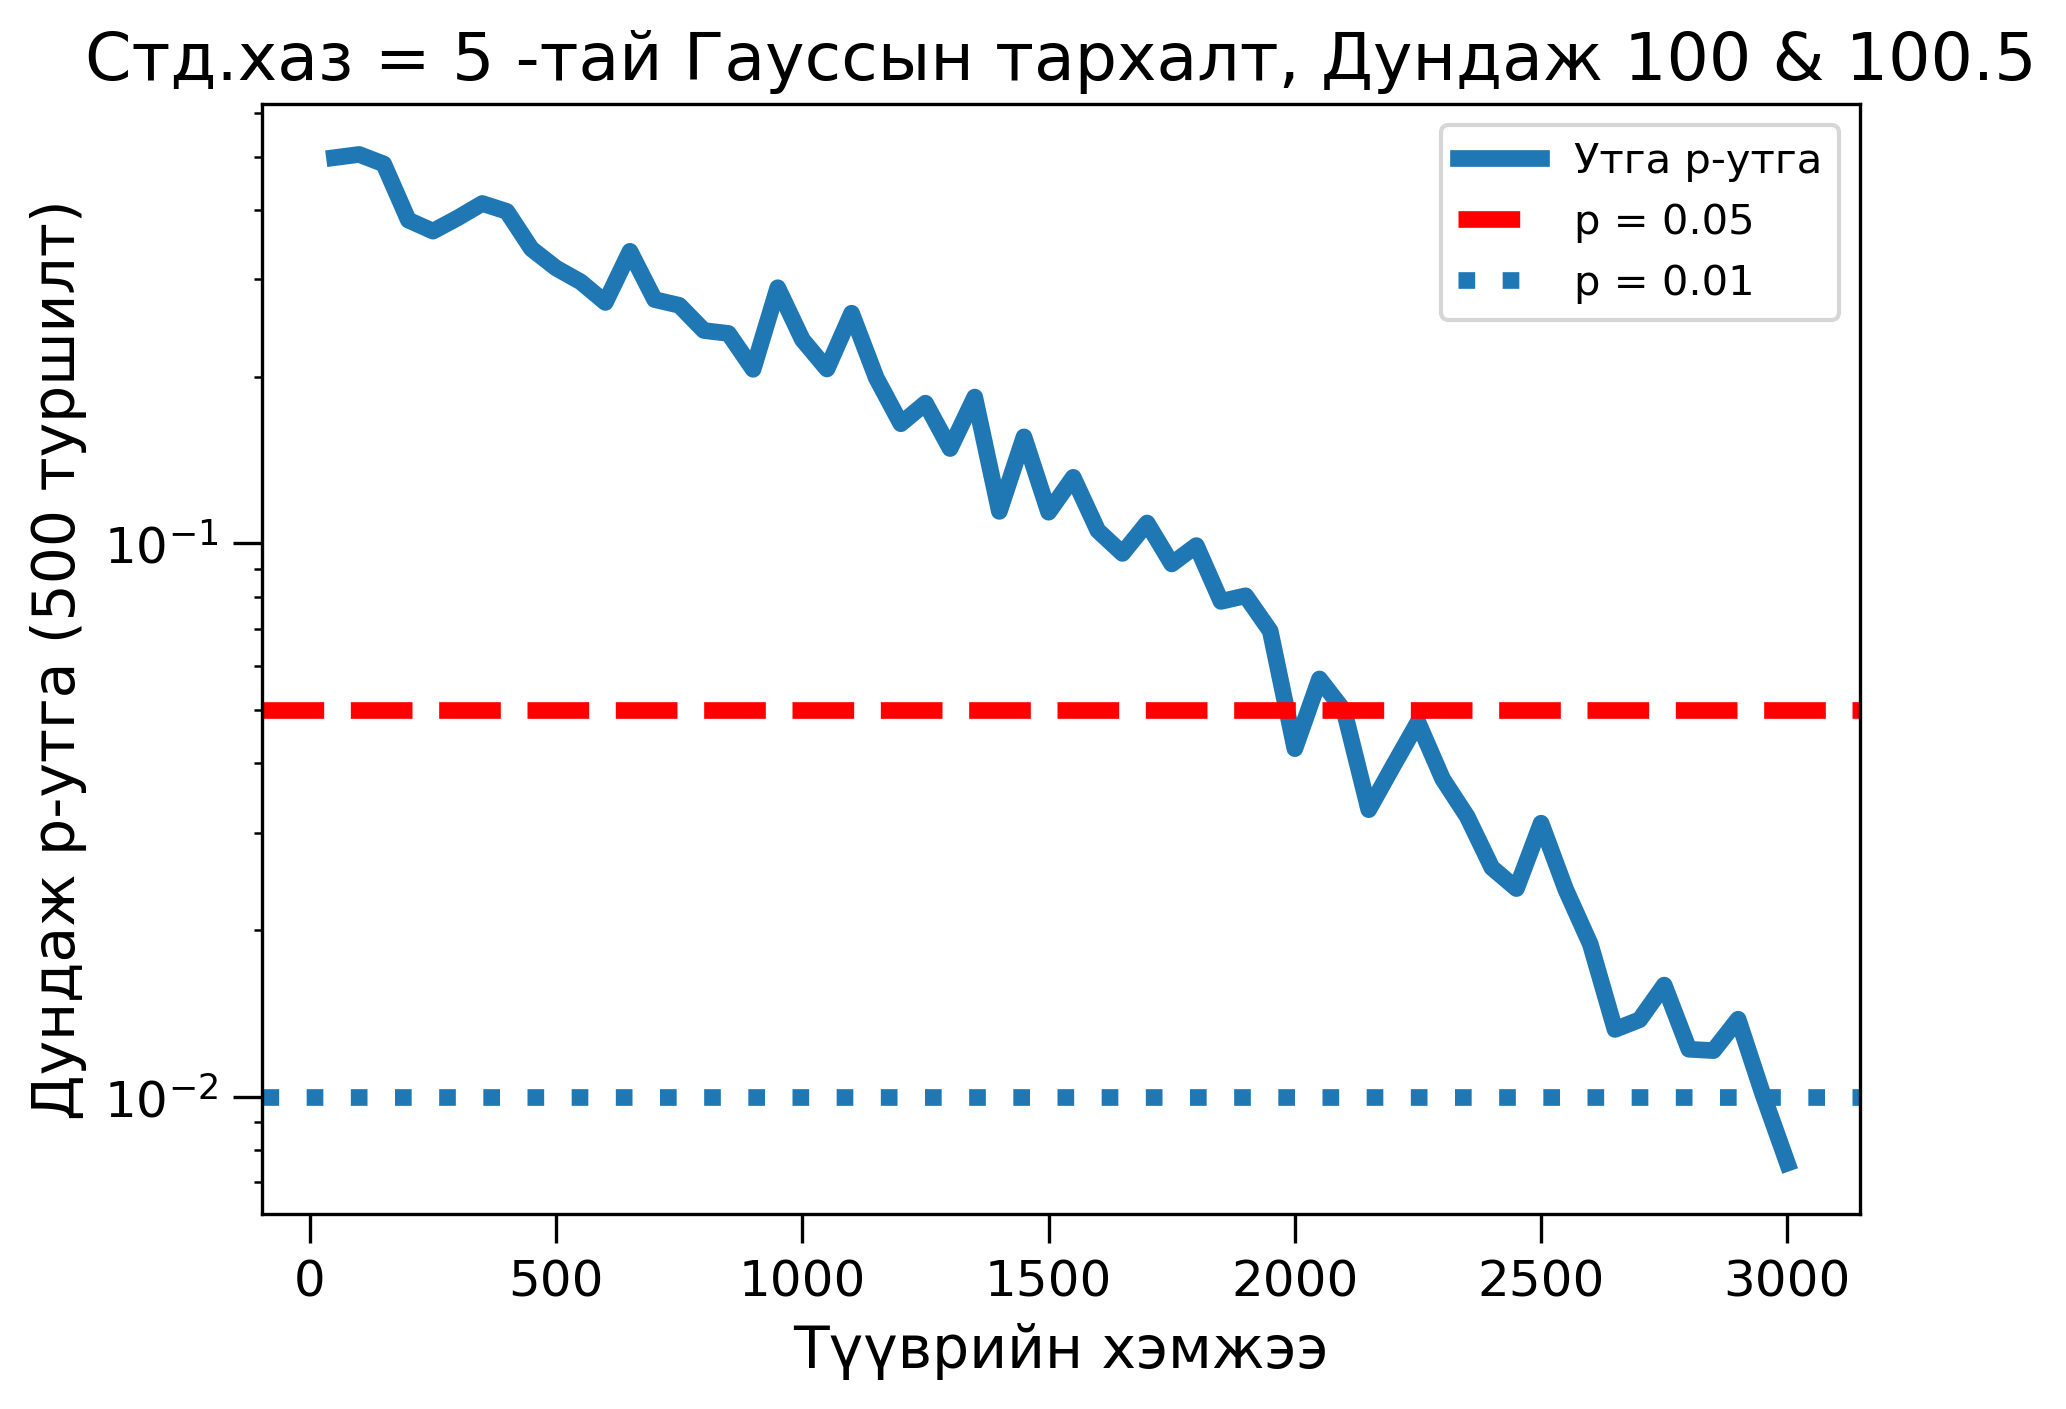

In [10]:
# Code to produce Figure 21-10 on page 475
random.seed(0)
num_trials = 50
gaussian_1, gaussian_2 = [], []
for _ in range(3100):
    gaussian_1.append(random.gauss(100, 5))
    gaussian_2.append(random.gauss(100.5, 5))
p_vals_means = []
for sample_size in range(50, 3040, 50):
    p_vals = []
    for t in range(num_trials):
        sample_1 = random.sample(gaussian_1, sample_size)
        sample_2 = random.sample(gaussian_2, sample_size)
        p_vals.append(scipy.stats.ttest_ind(sample_1, sample_2)[1])
    p_vals_means.append(sum(p_vals)/len(p_vals))
plt.plot(range(50, 3040, 50), p_vals_means, label = 'Утга p-утга')
plt.ylabel('Дундаж p-утга (500 туршилт)')
plt.xlabel('Түүврийн хэмжээ')
plt.title('Стд.хаз = 5 -тай Гауссын тархалт, Дундаж 100 & 100.5')
plt.axhline(0.05, color = 'r', linestyle = 'dashed', label = 'p = 0.05')
plt.axhline(0.01, linestyle = ':', label = 'p = 0.01')
plt.yticks(np.arange(0, 1, 0.1))
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.savefig('figure21-10.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)